# Applying GUI warps to other data

The [Parsing GUI results](parse.ipynb) notebook demonstrated how **mwarp1d.loadnpz** can be used to load warping results, and in particular to apply the saved warps to arbitrary data. This can be useful when dealing with multivariate 1D data, as demonstrated below.

The example dataset (in ./mwarp1d/examples/data) consists of 8 observations of a three-component vector that is measured over time at 100 equally spaced nodes. Let's refer to these counts as J=8, I=3, and Q=100, respectively, and let's call the three vector components "X", "Y" and "Z". All three components are saved in the example NPY file: 

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import mwarp1d

dirDATA  = mwarp1d.get_data_dir()
fnameNPY = os.path.join( dirDATA, 'Dorn2012_xyz.npy' )
A        = np.load(fnameNPY)

print(A.shape)

(8, 100, 3)


Note that the array shape is (J, Q, I).

The three vector components can be visualized like this:

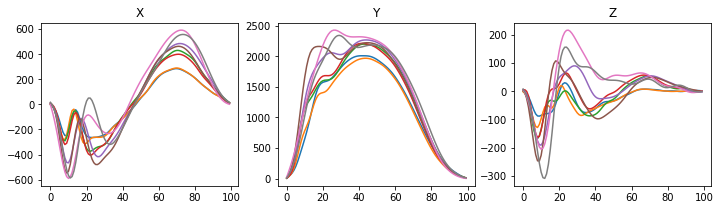

In [3]:
plt.figure( figsize=(12,3) )

ax  = plt.subplot(131)
ax.plot(A[:,:,0].T)
ax.set_title('X')

ax  = plt.subplot(132)
ax.plot(A[:,:,1].T)
ax.set_title('Y')

ax  = plt.subplot(133)
ax.plot(A[:,:,2].T)
ax.set_title('Z')

plt.show()

The **mwarp1d** GUI was used to define warps for each of the 7 sources, but only for the X component, as can be seen by loading the NPZ results file:

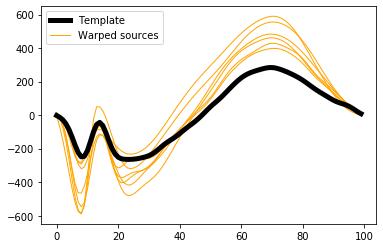

In [4]:
fnameNPZ = os.path.join(dirDATA, 'warps_Dorn2012_landmark.npz')
results  = mwarp1d.loadnpz(fnameNPZ)

plt.figure()
ax  = plt.axes()
h0  = ax.plot(results.template,  'k', lw=5, zorder=1)[0]
h1  = ax.plot(results.sources_warped.T, 'orange', lw=1, zorder=0)[0]
ax.legend([h0,h1], ['Template','Warped sources'])
plt.show()

To apply the saved warps to the other vector components, use the **apply_warps** method like this:

In [5]:
warpedX = results.apply_warps( A[:,:,0] )
warpedY = results.apply_warps( A[:,:,1] )
warpedZ = results.apply_warps( A[:,:,2] )

The results can be visualized as above:

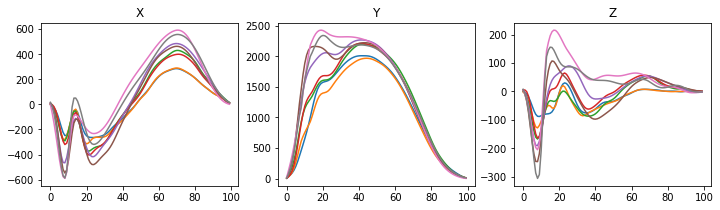

In [6]:
plt.figure( figsize=(12,3) )

ax  = plt.subplot(131)
ax.plot(warpedX.T)
ax.set_title('X')

ax  = plt.subplot(132)
ax.plot(warpedY.T)
ax.set_title('Y')

ax  = plt.subplot(133)
ax.plot(warpedZ.T)
ax.set_title('Z')

plt.show()

If the X, Y and Z data are saved as separate 2D arrays (e.g. in separate CSV files), first load them as 2D NumPy arrays like this:

In [7]:
fnameX = os.path.join( dirDATA, 'Dorn2012_x.csv' )
fnameY = os.path.join( dirDATA, 'Dorn2012_y.csv' )
fnameZ = os.path.join( dirDATA, 'Dorn2012_Z.csv' )

X      = np.loadtxt(fnameX, delimiter=',')
Y      = np.loadtxt(fnameY, delimiter=',')
Z      = np.loadtxt(fnameZ, delimiter=',')

print(X.shape)
print(Y.shape)
print(Z.shape)

(8, 100)
(8, 100)
(8, 100)


Then apply the warps as above:

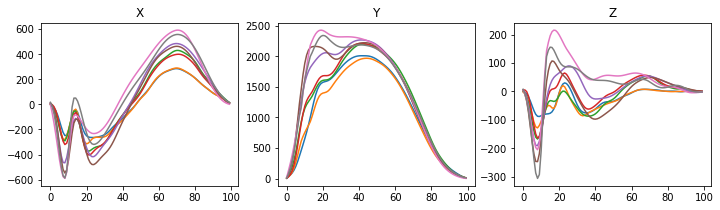

In [8]:
Xw = results.apply_warps( X )
Yw = results.apply_warps( Y )
Zw = results.apply_warps( Z )



plt.figure( figsize=(12,3) )

ax  = plt.subplot(131)
ax.plot(Xw.T)
ax.set_title('X')

ax  = plt.subplot(132)
ax.plot(Yw.T)
ax.set_title('Y')

ax  = plt.subplot(133)
ax.plot(Zw.T)
ax.set_title('Z')

plt.show()